# **CognoRise Infotech Data Analytics Internship Task 2**

## **Customer Personality Analysis**

• Customer Personality Analysis is a detailed analysis of a company’s ideal 
customers. It helps a business to better understand its customers and makes it 
easier for them to modify products according to the specific needs, behaviors and 
concerns of different types of customers.

• Customer personality analysis helps a business to modify its product based on its 
target customers from different types of customer segments. For example, instead 
of spending money to market a new product to every customer in the company’s 
database, a company can analyze which customer segment is most likely to buy 
the product and then market the product only on that particular segment.

### **Exploratory Data Analysis**

In [2]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# import dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Shape of dataset
df.shape

(2240, 29)

In [12]:
# Datatypes 
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Statistical Description of dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
# Checking for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: ylabel='Income'>

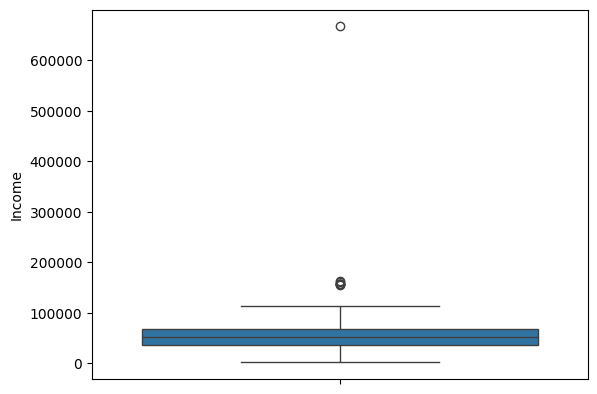

In [21]:
# Checking for outliers in "Income" column

sns.boxplot(df, y="Income")

In [22]:
# Impute null values in "Income" column with median value

median = df['Income'].median()
df['Income'] = df["Income"].fillna(median)

In [23]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [26]:
# Checking for duplicated values
df.duplicated().sum()

0

In [28]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [29]:
# Create a "Age" column using "Year_Birth" column
df['Age'] = 2024-df['Year_Birth']

In [30]:
df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

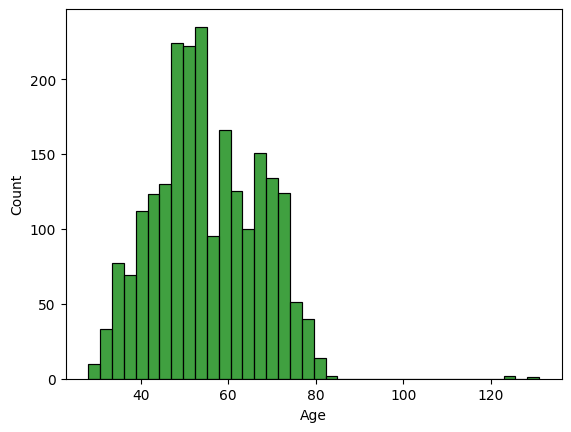

In [33]:
sns.histplot(df['Age'], color='green')

In [34]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

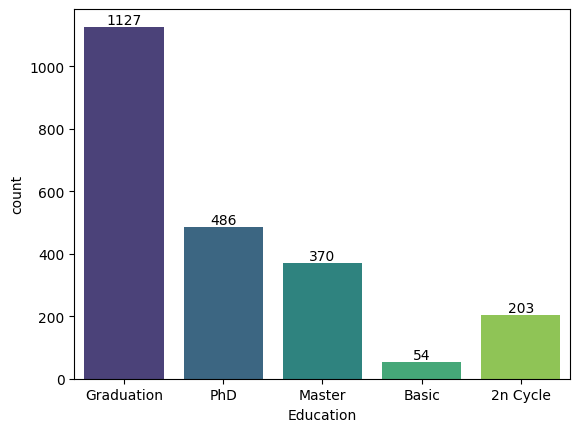

In [40]:
ax = sns.countplot(df,x='Education', palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: ylabel='count'>

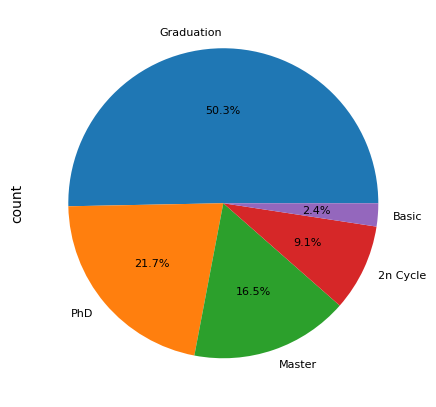

In [44]:
df['Education'].value_counts().plot(kind='pie', figsize=(5,6), fontsize=8,  autopct = '%1.1f%%')

Text(0.5, 1.0, 'Marital Status of Customers')

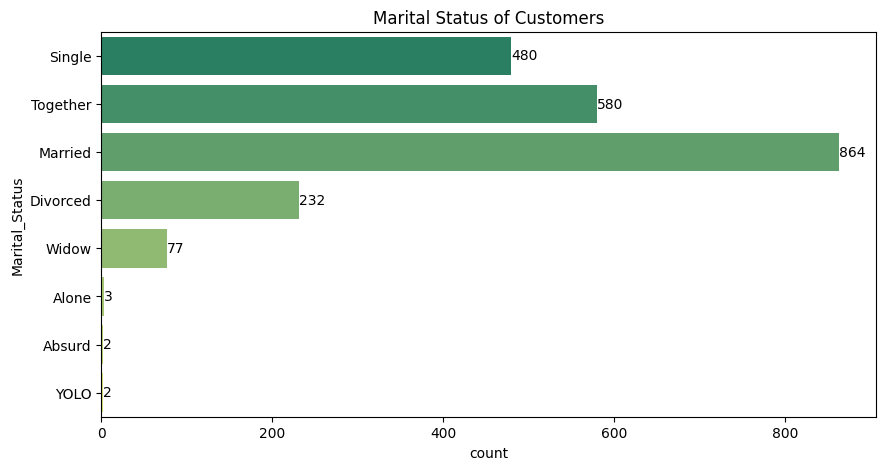

In [57]:
plt.figure(figsize=(10,5))
ms = sns.countplot(df['Marital_Status'], palette="summer")
for bars in ms.containers:
    ms.bar_label(bars)
plt.title("Marital Status of Customers")

<Figure size 800x800 with 0 Axes>

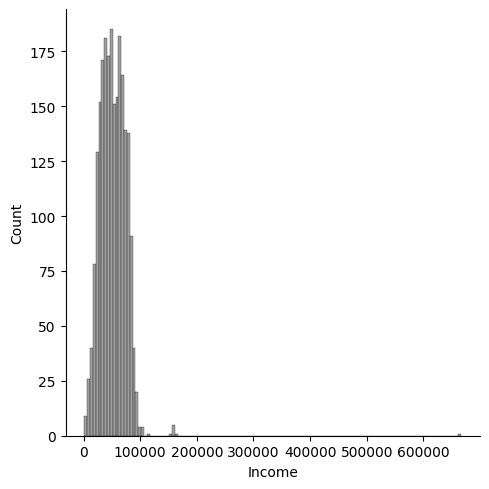

In [62]:
plt.figure(figsize=(8,8))
sns.displot(df['Income'], color="grey")

Text(0.5, 1.0, 'Data for kids available at home')

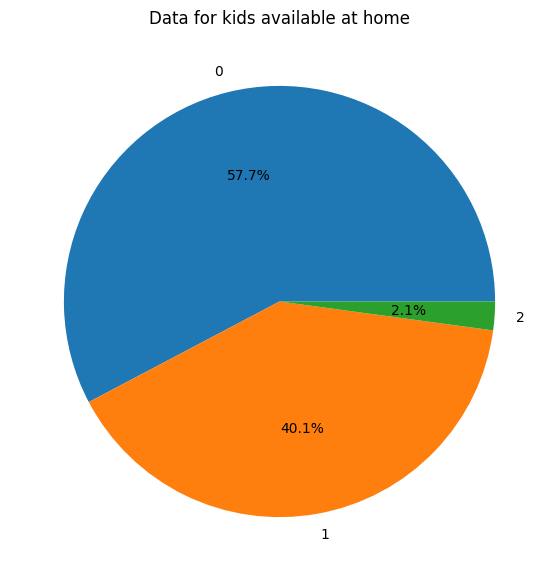

In [64]:
plt.figure(figsize=(7,7))
kid = df['Kidhome'].value_counts()
plt.pie(kid, autopct='%.1f%%', labels=[kid.index[0], kid.index[1], kid.index[2]])
plt.title("Data for kids available at home")

Text(0.5, 1.0, 'Data for teens available at home')

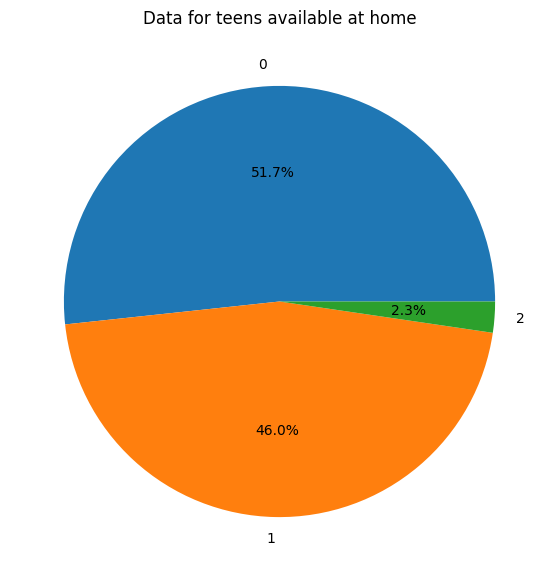

In [66]:
plt.figure(figsize=(7,7))
teen= df['Teenhome'].value_counts()
plt.pie(teen, autopct='%.1f%%', labels=[teen.index[0], teen.index[1], teen.index[2]])
plt.title("Data for teens available at home")

In [72]:
# Correlation
dff = df.drop(['Education', 'Dt_Customer', 'Marital_Status'], axis=1)

<Axes: >

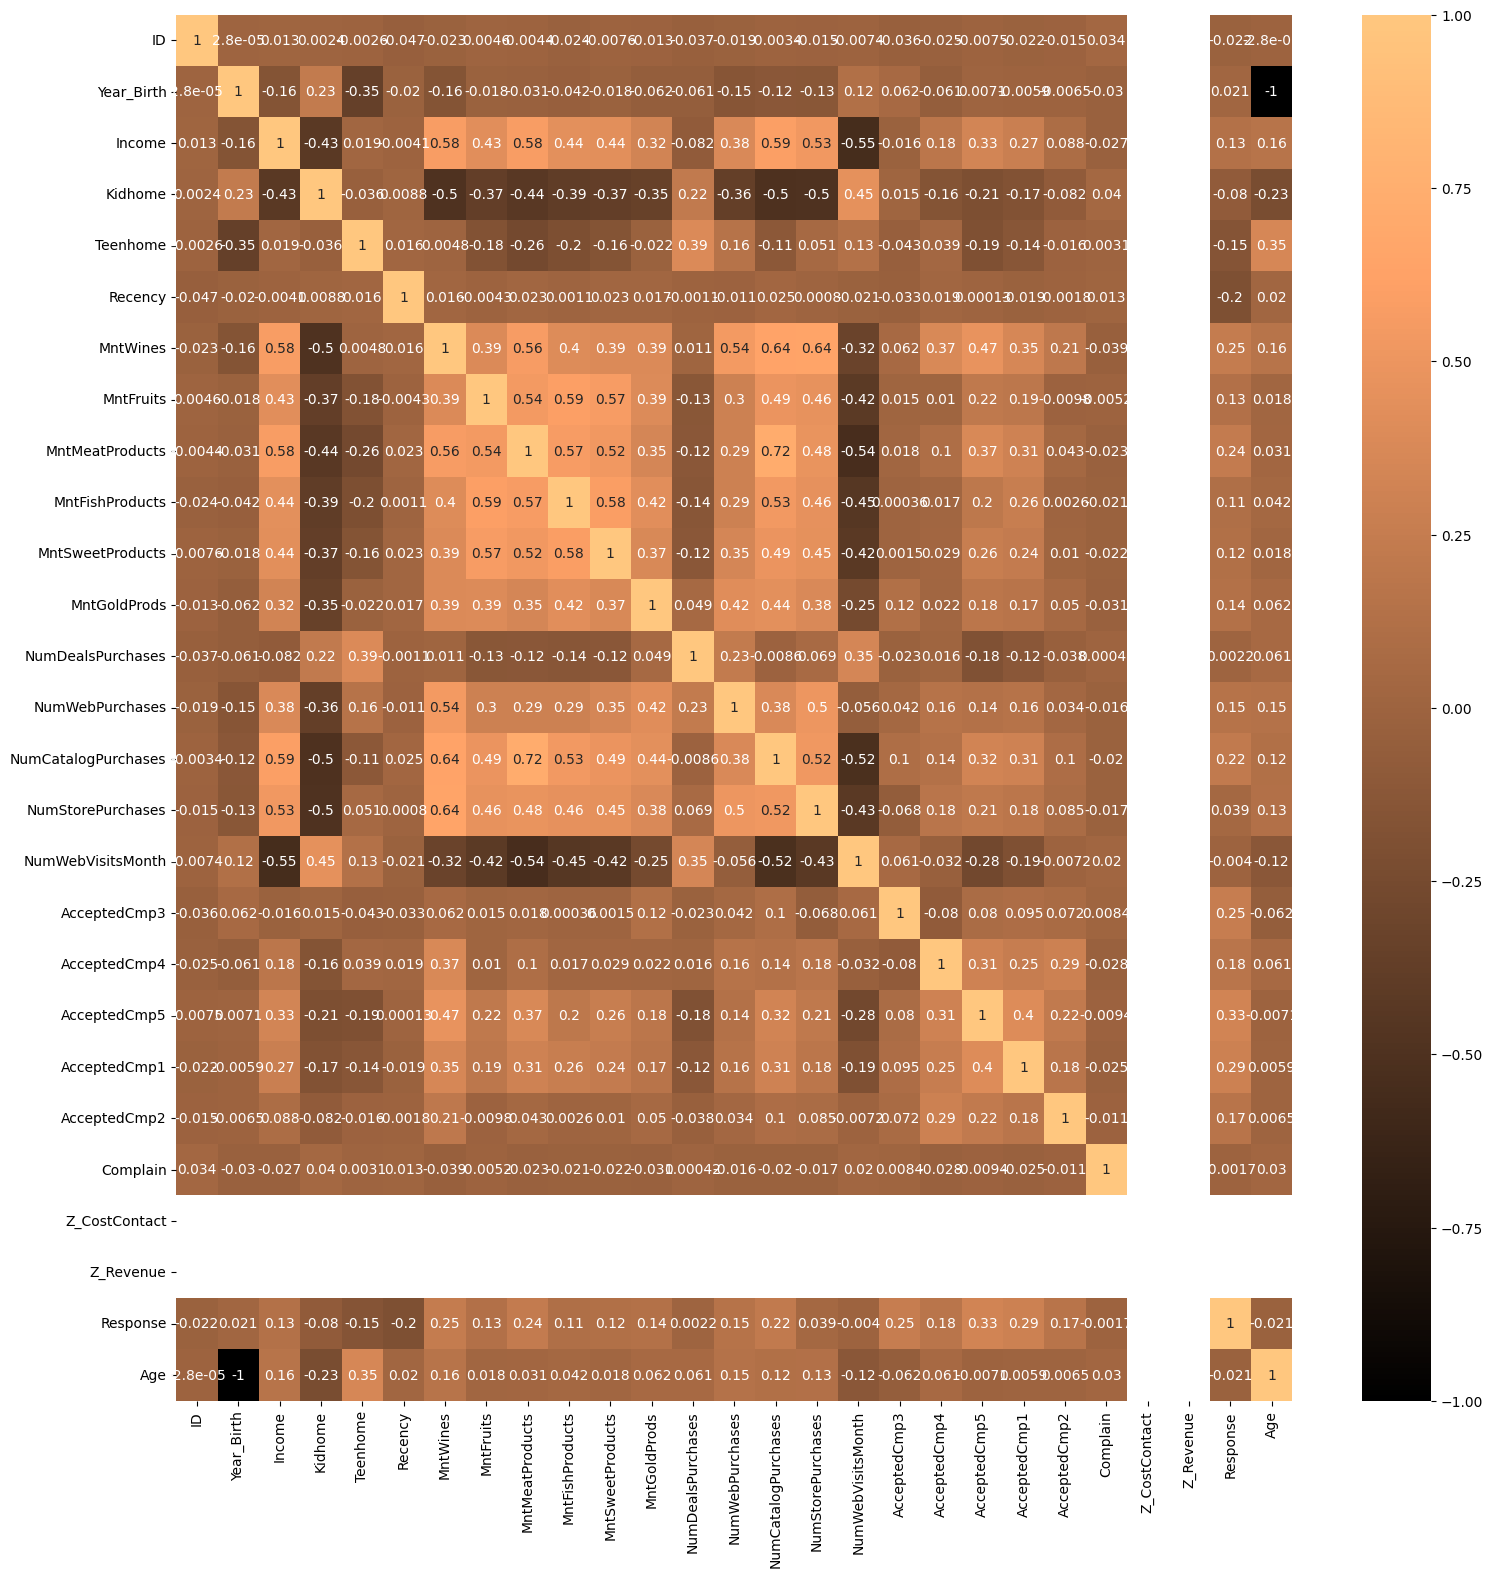

In [75]:
plt.figure(figsize=(18,18))
sns.heatmap(dff.corr(), annot=True, cmap="copper")

<Axes: xlabel='Income', ylabel='MntFishProducts'>

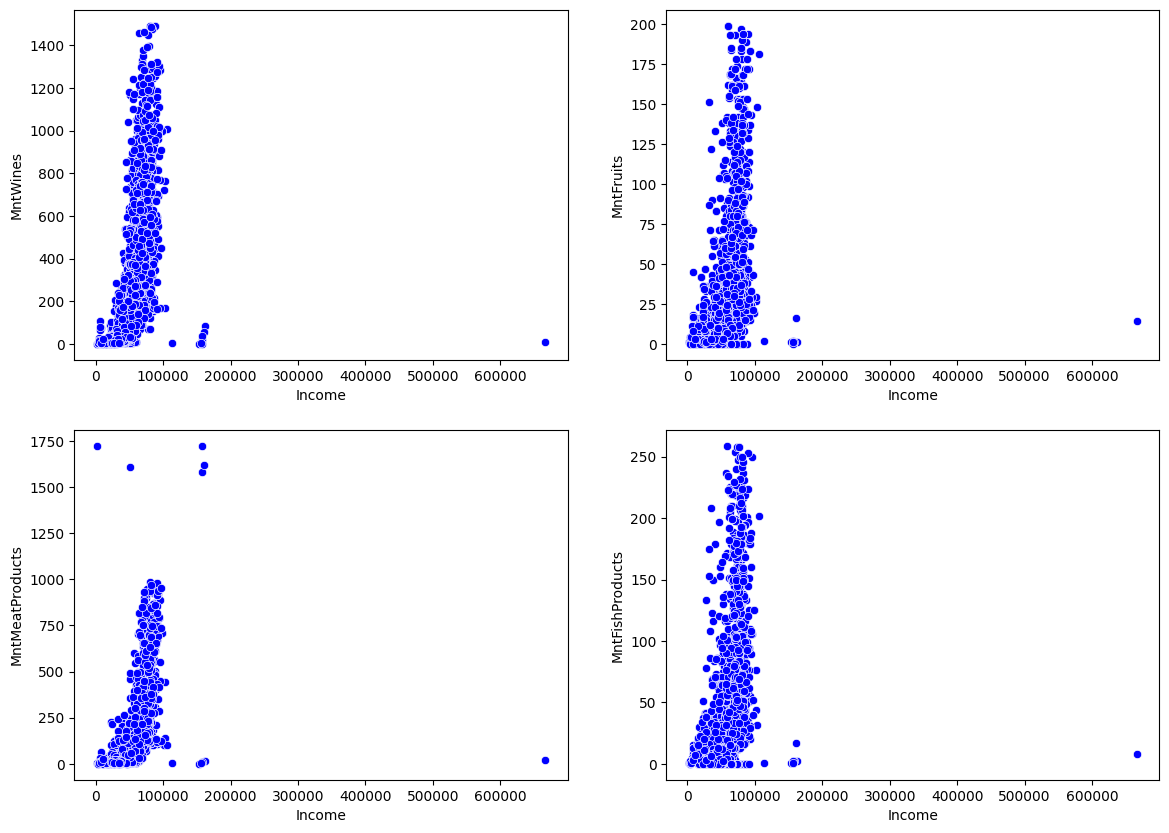

In [77]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Income', y='MntWines', color='blue')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Income', y='MntFruits', color='blue')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Income', y='MntMeatProducts', color='blue')
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Income', y='MntFishProducts', color='blue')

<BarContainer object of 5 artists>

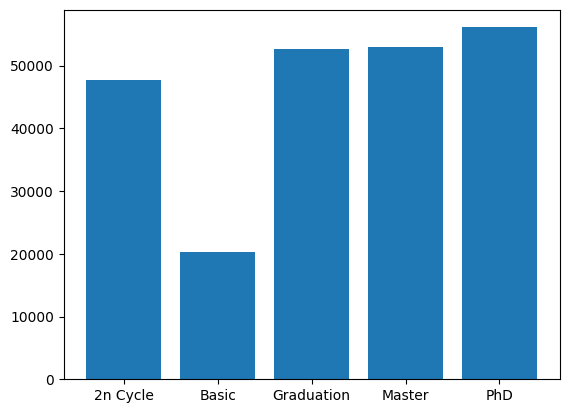

In [80]:
education_income = df.groupby('Education')['Income'].mean()
plt.bar(education_income.index,height=round(education_income,2))

### Data Cleaning and Feature Engineering

In [81]:
df = df.dropna()

In [82]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [83]:
df['Total_Spent'] = df['MntWines']+df['MntFruits']+df['MntFishProducts']+df['MntMeatProducts']+df['MntGoldProds']+df['MntSweetProducts']

In [85]:
df['Relation'] = df['Marital_Status'].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone":1})
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Relation'] + df['Children']

In [86]:
df = df.drop(['Relation', 'Children'], axis=1)

In [87]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

### Label Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder ## one hot encoding
from sklearn.preprocessing import StandardScaler ## Scale the values based on mean of data

In [89]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [90]:
lb = LabelEncoder()

In [91]:
df['Education'] = lb.fit_transform(df['Education'])

In [92]:
df['Education']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int32

In [94]:
df1 = df.copy()
to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
df1 = df1.drop(to_drop, axis=1)

In [96]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Family_Size
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,67,1617,1
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,70,27,3
2,4141,1965,2,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,59,776,2
3,6182,1984,2,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,40,53,3
4,5324,1981,4,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,43,422,3


In [100]:
scaler = StandardScaler()

### Perform Clustering

We are going to use Elbow method to find the optimum number of clusters

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [110]:
df = df.drop(['Marital_Status', 'Dt_Customer'], axis=1)

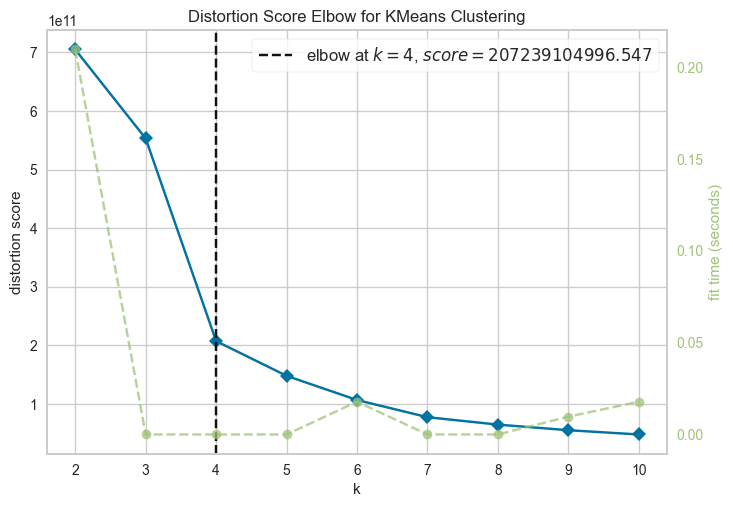

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()

In [112]:
from sklearn.cluster import KMeans

In [113]:
kmc = KMeans(n_clusters=4)
#fit model and predict clusters
pred = kmc.fit_predict(df)
df['Clusters'] = pred

In [114]:
df['Clusters']

0       0
1       0
2       2
3       1
4       0
       ..
2235    0
2236    0
2237    0
2238    2
2239    0
Name: Clusters, Length: 2240, dtype: int32

In [115]:
pal = ['#682F2F', '#B9C0C9', '#9F8A78', '#F3AB60']

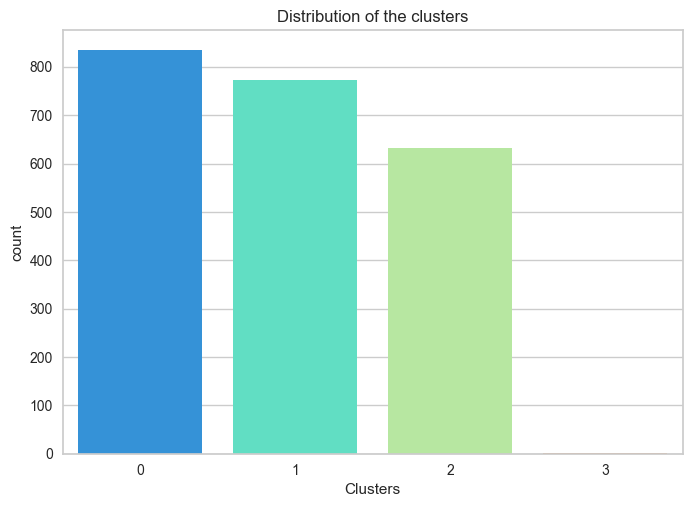

In [116]:
fig = sns.countplot(x = df['Clusters'], palette='rainbow')
fig.set_title("Distribution of the clusters")
plt.show()

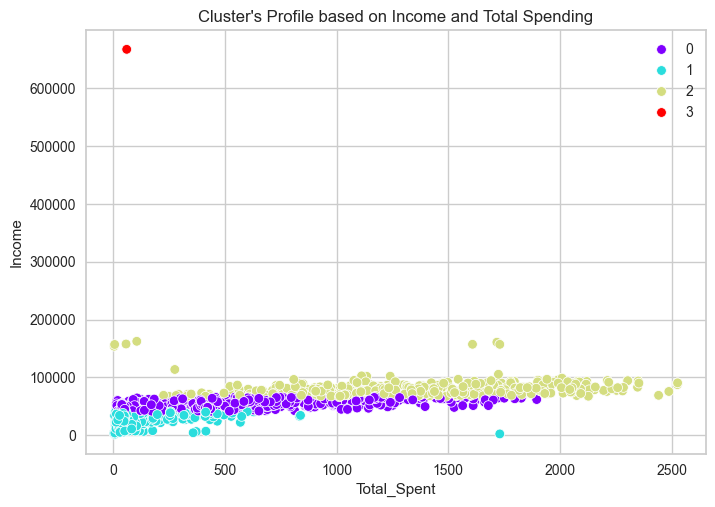

In [117]:
fig = sns.scatterplot(data=df, x=df['Total_Spent'], y=df['Income'], hue=df['Clusters'], palette='rainbow')
fig.set_title("Cluster's Profile based on Income and Total Spending")
plt.legend()
plt.show()

### Supervised Learning Approach

In [118]:
y = df['Response']
X_new = df.drop(['Response', 'Education'], axis=1)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)
print(X_train, X_test, y_train, y_test)

         ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
1875   9612        1987  23830.0        0         0        3         1   
1821   5684        1971  44635.0        1         1       25        56   
1859    521        1985  54006.0        1         0       42       174   
250   10236        1975  31160.0        1         0       59        16   
1585   1626        1973  35860.0        1         1       37        15   
...     ...         ...      ...      ...       ...      ...       ...   
919    4637        1954  74637.0        0         0       73       960   
1164   5922        1974  40344.0        0         1       48       210   
500    9135        1950  27203.0        1         1       92        13   
421    3129        1983  30096.0        1         0       30         5   
1829   1087        1975  22669.0        1         0       30        16   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp5  \
1875          8                6       

In [123]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
classifier.score(X_test, y_test)

0.8325892857142857

In [125]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8370535714285714

In [126]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier()

In [128]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
rf.score(X_test, y_test)

0.875